<h1 style="text-align:center;font-size:50px;"> IT help-desk ticket assignment </h1>

![](https://hfweb-assets.s3.amazonaws.com/img/it-help-desk-software.png)

<h2> 1. Problem overview </h2>

In any company, whenever an employee faces a technical problem related to the computer they had been provided by the company, they must file a complaint in the form of a **ticket** to the IT cell regarding this problem.

From there the ticket is usually prioritized. Work stoppages like a laptop that won't boot, an account lockout, or a down server get high priority while simple service requests like adding an entry to the company address book or a question about doing something in Excel gets a lower priority since the end user is still able to work.

The tickets are then usually distributed to a group of techs by whatever system the company uses

<h2> 2. How does ML come into picture ?</h2>

Currently for each submitted ticket helpdesk operators waste a lot of time evaluating tickets and trying to assign values to properties like:
- ticket_type
- urgency
- impact
- category, etc.

**So, the main challenge is to create a model for automatic tickets classification for a company's helpdesk solution.**

<h2>3. Formal problem desription </h2>

Given a dataset containing complaints, title of complaints in a ticket you would have to predict its ticket-type, urgency, impact, category.

<h2>4. Dataset used </h2>

The dataset used is anonymized,i.e, the actual target labels have been replaced with numbers. Link for dataset:

https://privdatastorage.blob.core.windows.net/github/support-tickets-classification/datasets/all_tickets.csv .

<h2> 5. Metrics </h2>

The following metric would be used to judge performance of models.
- Validation loss
- Validation accuracy

<h2> 6. Data loading </h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
fname = "all_tickets.csv"

df = pd.read_csv(fname)
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
title               47837 non-null object
body                48549 non-null object
ticket_type         48549 non-null int64
category            48549 non-null int64
sub_category1       48549 non-null int64
sub_category2       48549 non-null int64
business_service    48549 non-null int64
urgency             48549 non-null int64
impact              48549 non-null int64
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


<h4> Total no.of rows is 48,549. Title column has some NaNs</h4>

In [11]:
df.shape

(48549, 9)

In [12]:
df.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

<h2> 7. Data visualization </h2>

Visualizing the class distributions of:
- category
- ticket_type
- urgency
- impact

In [6]:
# Importing necessary modules 
import seaborn as sns
import matplotlib.pyplot as plt

<h3>7.1 Category </h3>

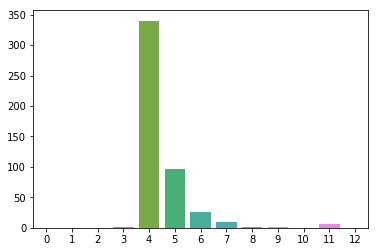

In [7]:
val_cnts = dict(df["category"].value_counts())
x = list(val_cnts.keys())
y = list(val_cnts.values())

sns.barplot(x=x, y=np.array(y)//100)

**Observations :**  
- There are 13 classes.
- Data is imbalanced.

<h3> 7.2 Ticket-type </h3>

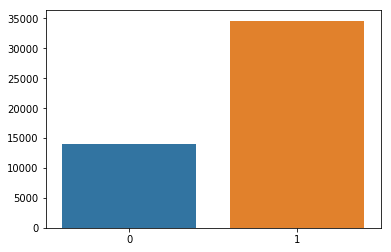

In [8]:
val_cnts = dict(df["ticket_type"].value_counts())
x = list(val_cnts.keys())
y = list(val_cnts.values())

sns.barplot(x=x, y=y)

**Observations :** 
- There are 2 types of ticket
- Again there is imbalance in data.

<h3> 7.3 Urgency </h3>

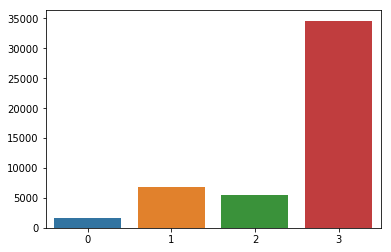

In [9]:
val_cnts = dict(df["urgency"].value_counts())
x = list(val_cnts.keys())
y = list(val_cnts.values())

sns.barplot(x=x, y=y)

**Observations :** 
- There are 4 classes in urgency.
- Again there is imbalance in data.

<h3> 7.4 Impact </h3>

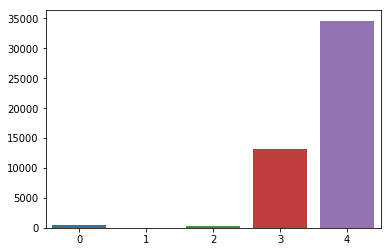

In [10]:
val_cnts = dict(df["impact"].value_counts())
x = list(val_cnts.keys())
y = list(val_cnts.values())

sns.barplot(x=x, y=y)

**Observations :** 
- There are 5 classes in impact.
- Again there is imbalance in data.

<h2> Techniques for dealing with imbalanced data. </h2>

- Oversampling : By duplicating datapoints of the minority classes.
- Synthetic sampling(SMOTE) : Synthetically generate datapoints of the minority classes.
- Use a weighted cost function: A greater penalty is charged when model misclassifies a minority class' datapoint.

Here I would be using the third remedy.